# County Sensor Map, PCA & Agglomerative Clustering
Here we sart of by looking at sensor map locations by using the cartopy package. 
Next we explore some PCA and agglomerative clustering using the features 'DAILY_AQI_VALUE', 'Income', 'ED_Visits' and the master.csv file. Subsequently we decide to try diffrent features and files.

In [43]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import csv
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, AgglomerativeClustering

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

In [44]:
ozone = pd.read_csv('CA_ozone.csv') #creating pandas dataframes to get sensor coordinates
pm2 = pd.read_csv('CA_pm2.csv') 

In [45]:
# making county dataframes 'Orange', 'San Diego', 'Riverside', 'San Bernardino', 'Ventura', 'Los Angeles'
# for each csv

orange = ozone.loc[ozone["COUNTY"]=="Orange"]
san_diego = ozone.loc[ozone["COUNTY"]=="San Diego"]
riverside = ozone.loc[ozone["COUNTY"]=="Riverside"]
san_bernardino = ozone.loc[ozone["COUNTY"]=="San Bernardino"]
ventura = ozone.loc[ozone["COUNTY"]=="Ventura"]
los_angeles = ozone.loc[ozone["COUNTY"]=="Los Angeles"]

orange2 = pm2.loc[pm2["COUNTY"]=="Orange"]
san_diego2 = pm2.loc[pm2["COUNTY"]=="San Diego"]
riverside2 = pm2.loc[pm2["COUNTY"]=="Riverside"]
san_bernardino2 = pm2.loc[pm2["COUNTY"]=="San Bernardino"]
ventura2 = pm2.loc[pm2["COUNTY"]=="Ventura"]
los_angeles2 = pm2.loc[pm2["COUNTY"]=="Los Angeles"]

In [46]:
# concatinating the county dataframes to make ozone and pm2 dataframes with our counties

ozone_county = pd.concat([orange, san_diego, riverside, san_bernardino, ventura, los_angeles])
pm2_county = pd.concat([orange2, san_diego2, riverside2, san_bernardino2, ventura2, los_angeles2])

ShapefileException: Unable to open /countyl010g_shp_nt00964/countyl010g.dbf or /countyl010g_shp_nt00964/countyl010g.shp.

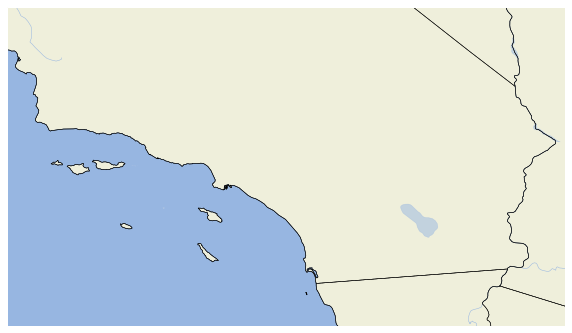

In [53]:
plt.figure(figsize=(10,7)) # fig size

ca_map = plt.axes(projection=ccrs.PlateCarree()) # creating the map; projection determines what the map looks like

ca_map.set_extent([-121, -114, 36, 32]) # to zoom into desired area of california

ca_map.add_feature(cfeature.LAND) # adding features to the map
ca_map.add_feature(cfeature.OCEAN)
ca_map.add_feature(cfeature.COASTLINE)
ca_map.add_feature(cfeature.BORDERS, linestyle=':')
ca_map.add_feature(cfeature.LAKES, alpha=0.5)
ca_map.add_feature(cfeature.RIVERS)
ca_map.add_feature(cfeature.STATES.with_scale('10m'))

reader = shpreader.Reader('countyl010g.shp') #getting the county geometries out of shape file
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())
ca_map.add_feature(COUNTIES, facecolor='none', edgecolor='gray')

ca_map.xaxis.set_visible(True) # showing longitude and latitude
ca_map.yaxis.set_visible(True)


plt.scatter(ozone_county['SITE_LONGITUDE'], ozone_county['SITE_LATITUDE'], label="Ozone Sensor", transform=ccrs.PlateCarree()) #plotting sensor locations on the map
plt.scatter(pm2_county['SITE_LONGITUDE'], pm2_county['SITE_LATITUDE'], label="pm2.5 Sensor", transform=ccrs.PlateCarree())            

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend()

In [52]:
ia = pd.read_csv('master_data.csv')  #making dataframes by year and 3 features
ia2015 = ia.loc[ia["Year"]==2015]
ia2016 = ia.loc[ia["Year"]==2016]
ia2017 = ia.loc[ia["Year"]==2017]
ia2018 = ia.loc[ia["Year"]==2018]
features = ['DAILY_AQI_VALUE', 'Income', 'ED_Visits']

In [49]:
ia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           88 non-null     int64  
 1   Zip_Code             88 non-null     int64  
 2   City                 88 non-null     object 
 3   Income               88 non-null     float64
 4   Year                 88 non-null     int64  
 5   ED_Visits            88 non-null     int64  
 6   Asthma Age Adj       88 non-null     float64
 7   County               88 non-null     object 
 8   Daily Max 8hr Ozone  88 non-null     float64
 9   Daily AQI Ozone      88 non-null     float64
 10  Daily Mean PM2.5     88 non-null     float64
 11  DAILY_AQI_VALUE      88 non-null     float64
dtypes: float64(6), int64(4), object(2)
memory usage: 8.4+ KB


In [16]:
#PCA 2015

X = scale(ia2015.loc[:, features].values) # scale the dataset

pca_model = PCA()   # find PCA and transform to new coordinates
X_PCA = pca_model.fit_transform(X)

df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3'])  # create a new pandas dataframe 
df_plot.head()

,PC1,PC2,PC3
0,-0.502406,1.709391,1.228823
1,-1.795586,-0.107547,-0.678955
2,-0.917545,0.458637,-0.420296
3,0.643402,0.317285,0.883426
4,2.138324,0.695735,-0.933241


[0.53077216 0.28017698 0.18905086]


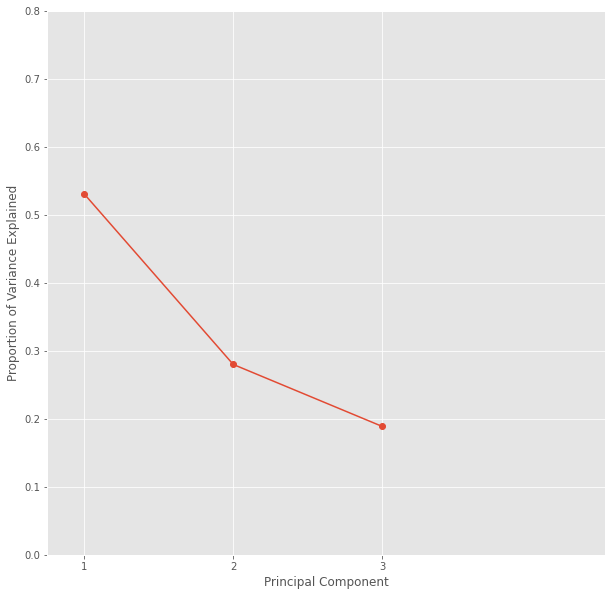

In [17]:
var_ratio = pca_model.explained_variance_ratio_    # explained variance ratio of the principal components
print(var_ratio)

plt.plot([1,2,3], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.5)
plt.ylim(0,0.8)
plt.xticks([1,2,3])
plt.show()

Text(0, 0.5, 'Second Principal Component')

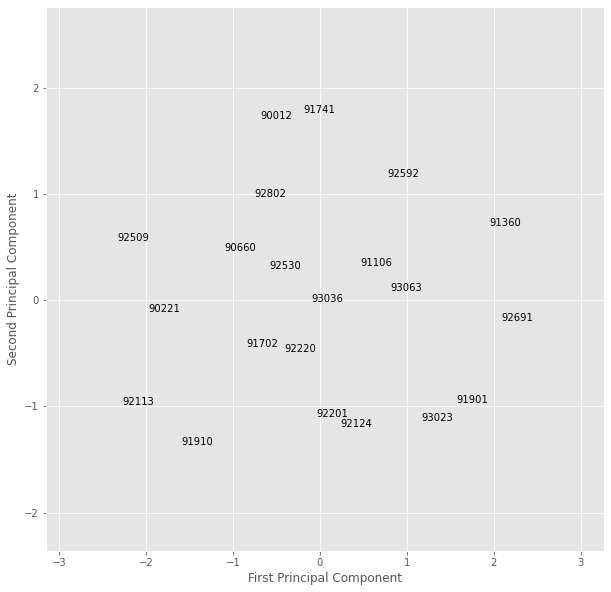

In [18]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)
                                                 
for i,zipc in enumerate(ia2015['Zip_Code'].values):       # Plot Principal Components 1 and 2
    ax1.annotate(zipc, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

    
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')


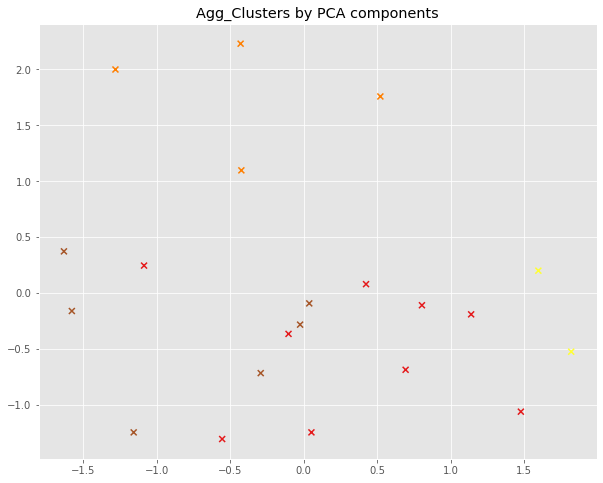

In [19]:
x_axis = df_plot['PC1']  # primary PCA component
y_axis = df_plot['PC2']  # secondary PCA component

agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=4)
y_pred = agg_cluster_model.fit_predict(X)

plt.figure(figsize=(10,8))

plt.title('Agg_Clusters by PCA components')
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="x", cmap=cmap);


In [20]:
#PCA 2016

X = scale(ia2016.loc[:, features].values) # scale the dataset

pca_model = PCA()   # find PCA and transform to new coordinates
X_PCA = pca_model.fit_transform(X)

df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3'])  # create a new pandas dataframe 
df_plot.head()

,PC1,PC2,PC3
0,0.512654,-2.100770,0.060944
1,1.317451,-0.122021,-0.452279
2,0.589509,-0.920856,-0.576494
3,-0.534607,-0.506026,0.570271
4,-2.121729,-0.309026,-1.174310


[0.50142656 0.34258189 0.15599155]


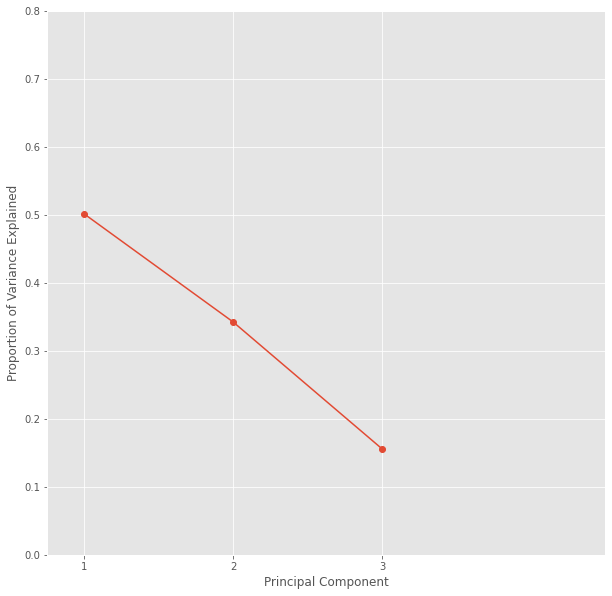

In [21]:
var_ratio = pca_model.explained_variance_ratio_    # explained variance ratio of the principal components
print(var_ratio)

plt.plot([1,2,3], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.5)
plt.ylim(0,0.8)
plt.xticks([1,2,3])
plt.show()

Text(0, 0.5, 'Second Principal Component')

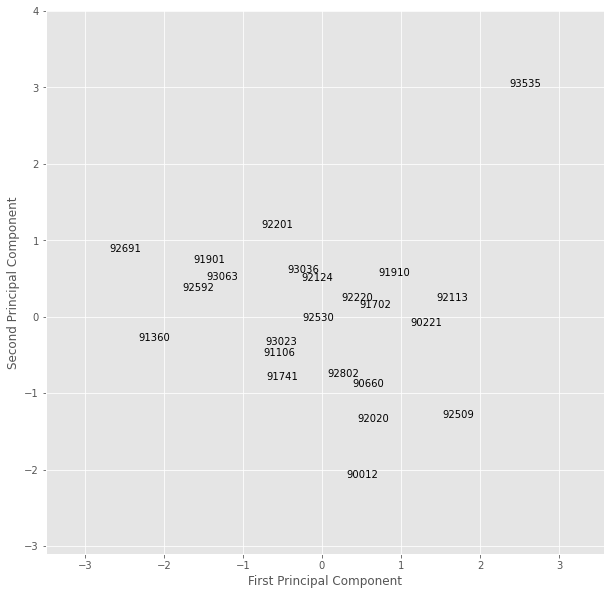

In [22]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)
                                                 
for i,zipc in enumerate(ia2016['Zip_Code'].values):       # Plot Principal Components 1 and 2
    ax1.annotate(zipc, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

    
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

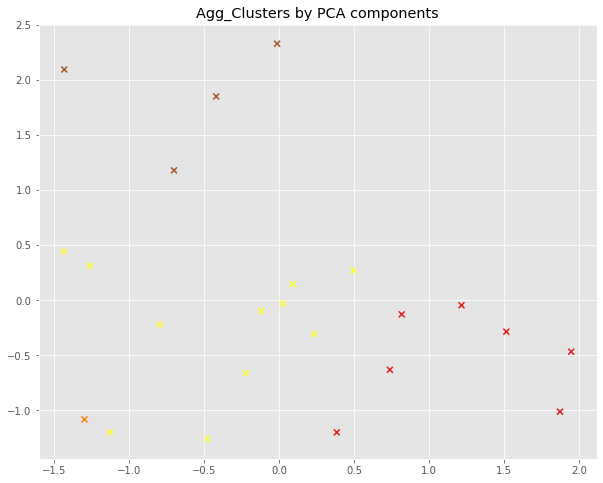

In [23]:
x_axis = df_plot['PC1']  # primary PCA component
y_axis = df_plot['PC2']  # secondary PCA component

agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=4)
y_pred = agg_cluster_model.fit_predict(X)

plt.figure(figsize=(10,8))

plt.title('Agg_Clusters by PCA components')
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="x", cmap=cmap);


In [24]:
#PCA 2017

X = scale(ia2017.loc[:, features].values) # scale the dataset

pca_model = PCA()   # find PCA and transform to new coordinates
X_PCA = pca_model.fit_transform(X)

df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3'])  # create a new pandas dataframe 
df_plot.head()

,PC1,PC2,PC3
0,-0.929550,-1.872954,-0.209332
1,-1.532559,-0.143091,-0.597042
2,-0.757623,-0.589396,-0.645500
3,0.400460,-0.637196,0.539263
4,2.303742,-0.220813,-0.922946


[0.50989159 0.34934737 0.14076104]


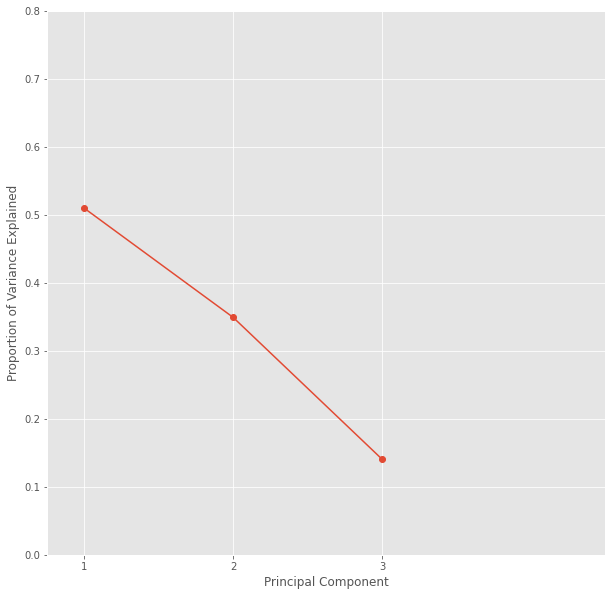

In [25]:
var_ratio = pca_model.explained_variance_ratio_    # explained variance ratio of the principal components
print(var_ratio)

plt.plot([1,2,3], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.5)
plt.ylim(0,0.8)
plt.xticks([1,2,3])
plt.show()

Text(0, 0.5, 'Second Principal Component')

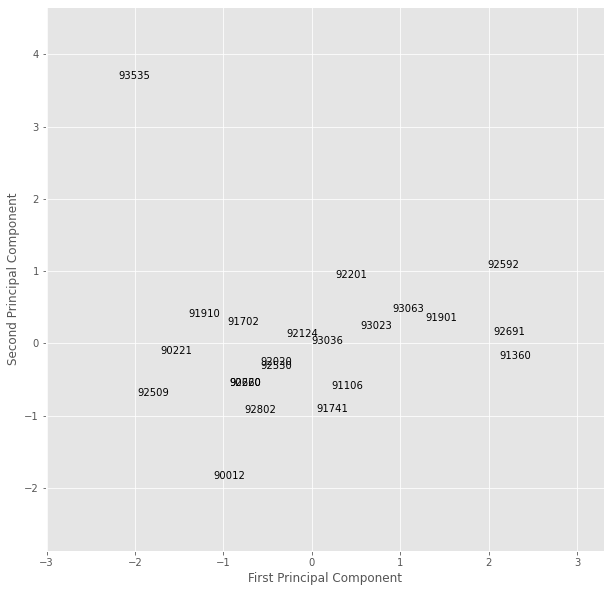

In [26]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)
                                                 
for i,zipc in enumerate(ia2017['Zip_Code'].values):       # Plot Principal Components 1 and 2
    ax1.annotate(zipc, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

    
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

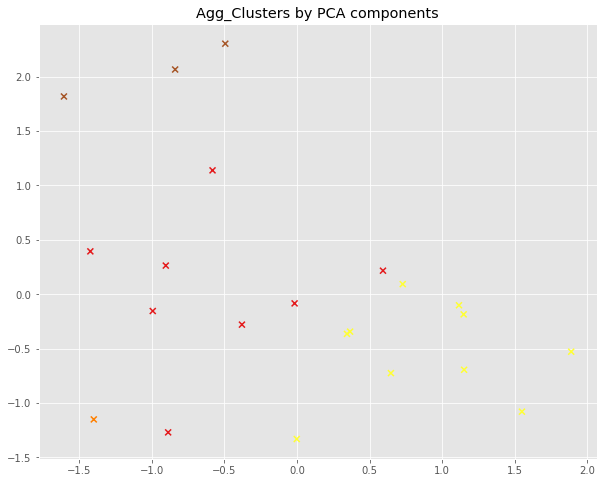

In [27]:
x_axis = df_plot['PC1']  # primary PCA component
y_axis = df_plot['PC2']  # secondary PCA component

agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=4)
y_pred = agg_cluster_model.fit_predict(X)

plt.figure(figsize=(10,8))

plt.title('Agg_Clusters by PCA components')
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="x", cmap=cmap);


In [28]:
#PCA 2018

X = scale(ia2018.loc[:, features].values) # scale the dataset

pca_model = PCA()   # find PCA and transform to new coordinates
X_PCA = pca_model.fit_transform(X)

df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3'])  # create a new pandas dataframe 
df_plot.head()

,PC1,PC2,PC3
0,-0.902057,-1.918346,-0.222570
1,-1.681927,-0.359058,-0.804777
2,-0.731540,-0.742467,-0.653174
3,0.279993,-0.859183,0.417627
4,2.164822,-0.262122,-1.051343


[0.50523844 0.36374638 0.13101518]


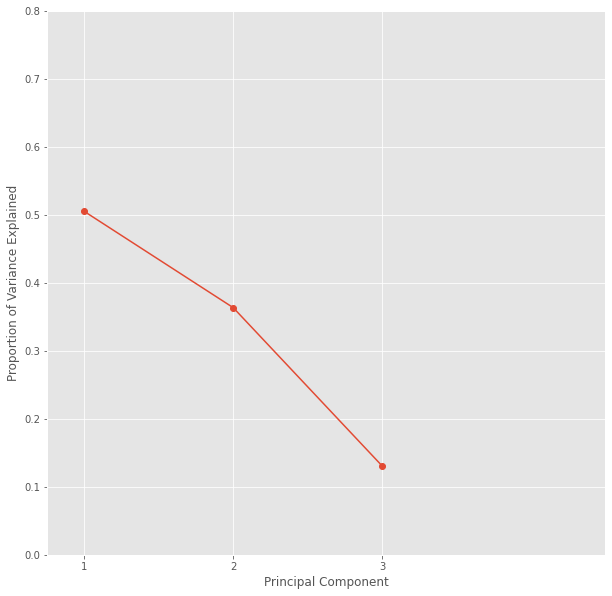

In [29]:
var_ratio = pca_model.explained_variance_ratio_    # explained variance ratio of the principal components
print(var_ratio)

plt.plot([1,2,3], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.5)
plt.ylim(0,0.8)
plt.xticks([1,2,3])
plt.show()

Text(0, 0.5, 'Second Principal Component')

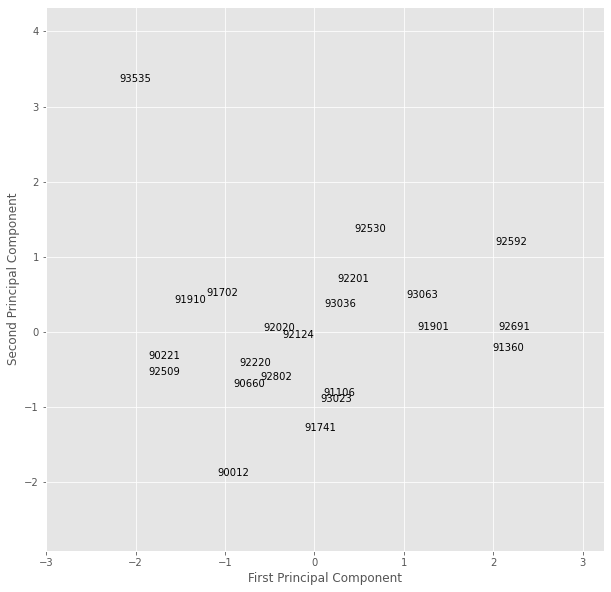

In [30]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)
                                                 
for i,zipc in enumerate(ia2018['Zip_Code'].values):       # Plot Principal Components 1 and 2
    ax1.annotate(zipc, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

    
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

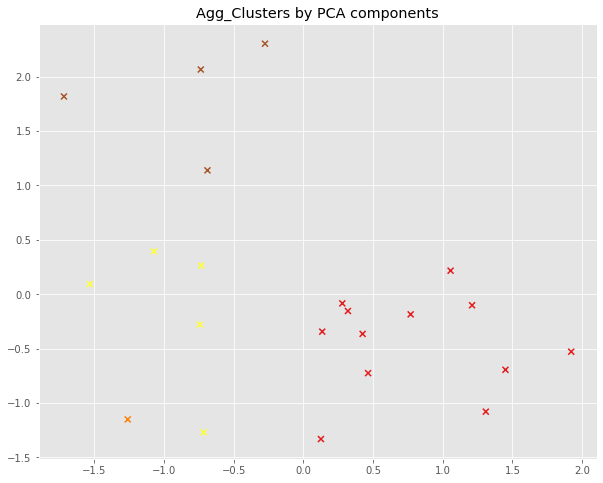

In [31]:
x_axis = df_plot['PC1']  # primary PCA component
y_axis = df_plot['PC2']  # secondary PCA component

agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=4)
y_pred = agg_cluster_model.fit_predict(X)

plt.figure(figsize=(10,8))

plt.title('Agg_Clusters by PCA components')
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="x", cmap=cmap);
